In [23]:
import torch #we will use this torch to create tensors to store all of the numerical values , including raw data and the values for each weights and biases
import torch.nn as nn #make the weight and bias tensors to be part of the neaural network
import torch.nn.functional as F #which gives us the activation functions
from torch.optim import Adam #Optimizer stochastic gradient descent  

import lightning as L
from torch.utils.data import DataLoader,TensorDataset

import matplotlib.pyplot as plt 
import seaborn as sns

from pytorch_lightning.utilities.seed import seed_everything

ImportError: cannot import name 'seed_everything' from 'pytorch_lightning.utilities.seed' (c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\pytorch_lightning\utilities\seed.py)

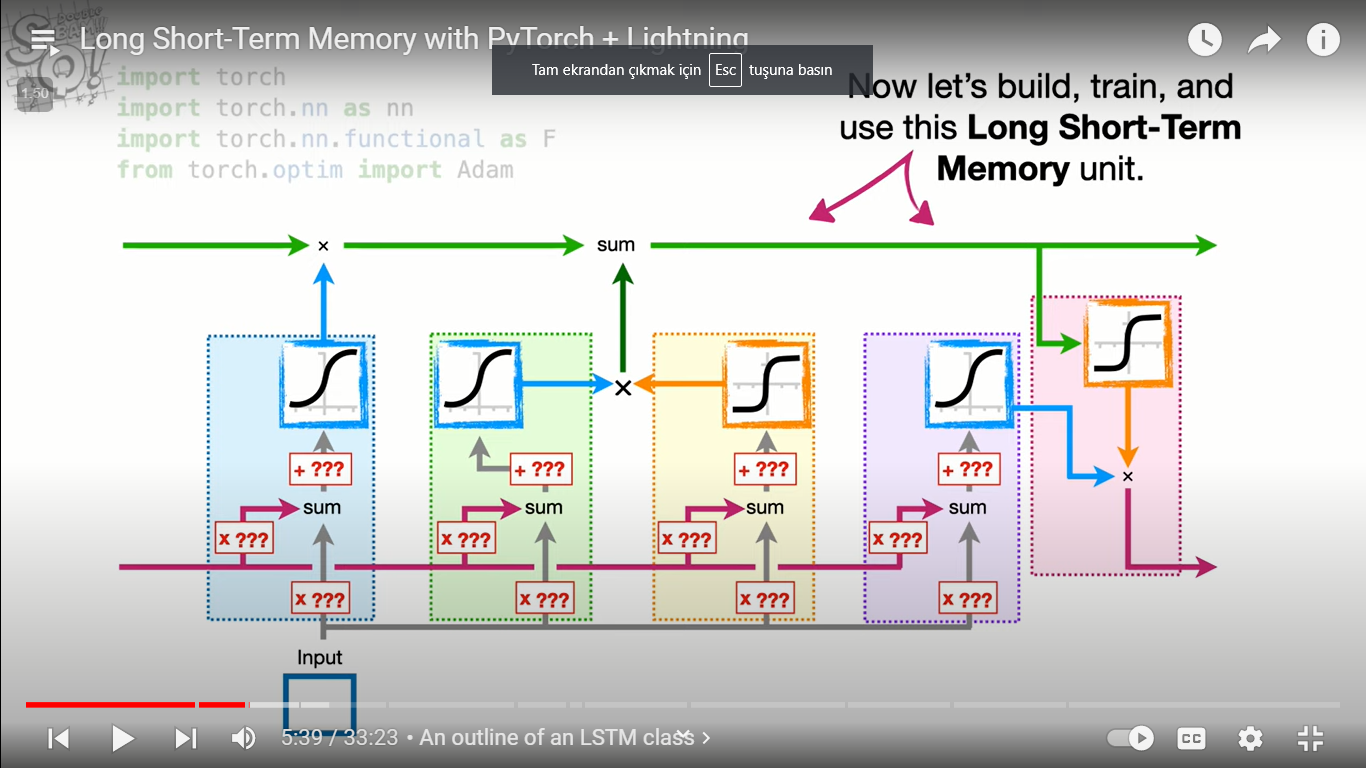

In [ ]:
from typing import Any


from lightning.pytorch.utilities.types import STEP_OUTPUT


class LSTM_by_hand(L.LightningModule):
    def __init__(self):
        
         #CREATE AND INITIALIZE WEIGHT AND BIASES
        super().__init__()
        
        seed_everything(seed=42)
        
        mean=torch.tensor(0.0)
        std=torch.tensor(1.0)

        self.wlr1=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.wlr2=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.blr1=nn.Parameter(torch.tensor(0.0),requires_grad=True)

        self.wpr1=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.wpr2=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.bpr1=nn.Parameter(torch.tensor(0.0),requires_grad=True)
        
        self.wp1=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.wp2=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.bp1=nn.Parameter(torch.tensor(0.0),requires_grad=True)
        
        self.wo1=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.wo2=nn.Parameter(torch.normal(mean=mean,std=std),requires_grad=True)
        self.bo1=nn.Parameter(torch.tensor(0.0),requires_grad=True)



    def lstm_unit(self,input_value,long_memory,short_memory):
        #DO THE LSTM MATH
        long_remember_percent=torch.sigmoid((short_memory*self.wlr1)+(input_value*self.wlr2)+(self.blr1))
        
        potential_remember_percent=torch.sigmoid((short_memory*self.wpr1)+(input_value*self.wpr2)+(self.bpr1))
        
        potential_memory= torch.tanh((short_memory*self.wp1)+(input_value*self.wp2)+(self.bp1))
        
        updated_long_memory=((long_memory*long_remember_percent)+(potential_remember_percent*potential_memory))
        
        output_percent=torch.sigmoid((short_memory*self.wo1)+(input_value*self.wo2)+(self.bo1))
        
        updated_short_memory=torch.tanh(updated_long_memory)*output_percent
        
        return([updated_short_memory,updated_long_memory])
    
    
    def forward(self,input):
        #MAKE A FORWARD PASS THROUGH UNROLLED LSTM
        long_memory=0
        short_memory=0
        day1=input[0]
        day2=input[1]
        day3=input[2]
        day4=input[3]

        long_memory,short_memory=self.lstm_unit(day1,long_memory,short_memory)
        long_memory,short_memory=self.lstm_unit(day2,long_memory,short_memory)
        long_memory,short_memory=self.lstm_unit(day3,long_memory,short_memory)
        long_memory,short_memory=self.lstm_unit(day4,long_memory,short_memory)

        return short_memory
    
    
    
    
    def configure_optimizers(self):
        return Adam(self.parameters())
        #Configure Adam Optimizer
    
    def training_step(self,batch,batch_idx):
        #Calculate the loss and log the training progress we're making during the training 
        input_i,label_i=batch
        output_i=self.forward(input_i[0])
        loss=(output_i-label_i)**2
        
        self.log('train_loss',loss)

        if (label_i ==0):
            self.log('out_0',output_i)
        else:
            self.log('out_1',output_i)
        return loss


In [ ]:
model=LSTM_by_hand()
print("\nNow let's compare the observed and predicted values...")
print("Company A: Observed=0, Predicted=",
      model(torch.tensor([0.,0.5,0.25,1.])).detach())


Now let's compare the observed and predicted values...
Company A: Observed=0, Predicted= tensor(0.3696)
